In [14]:
import numpy as np
import pandas as pd
import string
import matplotlib.pyplot as plt
import seaborn as sns
from typing_extensions import dataclass_transform
from google.colab import files
from sklearn.utils import shuffle

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import joblib

In [16]:
Data_1 = pd.read_csv('/content/DataP_1.csv')
Data_2 = pd.read_csv('/content/DataP_2.csv')
Data_3 = pd.read_csv('/content/DataP_3.csv')
Data_1 = Data_1.dropna()
Data_2 = Data_2.dropna()
Data_3 = Data_3.dropna()

In [17]:
#Data_C is the combined data
Data_C = pd.concat([Data_1, Data_2, Data_3], ignore_index = True)

In [18]:
Data_C = shuffle(Data_C).reset_index(drop=True)

In [19]:
Data_C.shape

(79312, 3)

In [20]:
#To drop any duplicacy present due to combination of datasets.
Data_C = Data_C.drop_duplicates()

In [21]:
Data_C.shape

(79063, 3)

In [22]:
vectorizer_C = TfidfVectorizer()
TC = vectorizer_C.fit_transform(Data_C['Tweet_P'])
joblib.dump(vectorizer_C, 'tfidf_vectorizer_C.pkl')
LC = Data_C['Label']
TC_train, TC_test, LC_train, LC_test = train_test_split(TC, LC, test_size=0.2, random_state=42)
print(TC_train.shape, TC_test.shape, LC_train.shape, LC_test.shape)

(63250, 43452) (15813, 43452) (63250,) (15813,)


In [23]:
#Logistic Regression Model
model_C = LogisticRegression(max_iter=10_00_000)
model_C.fit(TC_train, LC_train)

LogisticRegression(max_iter=1000000)

In [24]:
joblib.dump(model_C, 'logistic_regression_model_C.pkl')

['logistic_regression_model_C.pkl']

In [25]:
files.download('tfidf_vectorizer_C.pkl')
files.download('logistic_regression_model_C.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [26]:
LC_predicted = model_C.predict(TC_test)
print("Model trained on Combined Data & Tested on Same")
print("Accuracy Score 1: \n", accuracy_score(LC_test, LC_predicted))
print("Confusion Matrix: \n", confusion_matrix(LC_test, LC_predicted))
print("Classification Report: \n", classification_report(LC_test, LC_predicted))

Model trained on Combined Data & Tested on Same
Accuracy Score 1: 
 0.7654461519003352
Confusion Matrix: 
 [[3726 2157]
 [1552 8378]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.71      0.63      0.67      5883
           1       0.80      0.84      0.82      9930

    accuracy                           0.77     15813
   macro avg       0.75      0.74      0.74     15813
weighted avg       0.76      0.77      0.76     15813



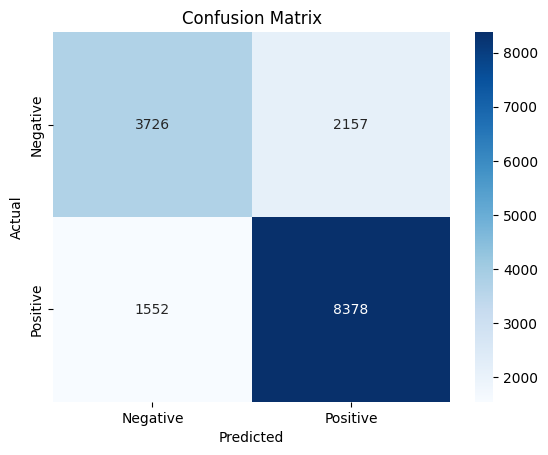

In [27]:
sns.heatmap(confusion_matrix(LC_test, LC_predicted), annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [28]:
Data_C=pd.DataFrame(Data_C)
Data_C.to_csv('Data_C.csv', index=False)
Data_C.head()
files.download('Data_C.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [29]:
#Testing it on Random Data
Data_R = pd.read_csv('/content/DataP_R.csv')
Data_R = Data_R.dropna()

In [30]:
TR = Data_R['Tweet_P']
LR = Data_R['Label']
TR_train, TR_test, LR_train, LR_test = train_test_split(TR, LR, test_size=0.5, random_state=42)

In [31]:
vectorizer_C = joblib.load('tfidf_vectorizer_C.pkl')
TR_test = vectorizer_C.transform(TR_test)
model_C = joblib.load('logistic_regression_model_C.pkl')
LR_predicted = model_C.predict(TR_test)
print("Model trained on Data Source C & Tested on Data Source R")
print("Accuracy Score 1: \n", accuracy_score(LR_test, LR_predicted))
print("Confusion Matrix: \n", confusion_matrix(LR_test, LR_predicted))
print("Classification Report: \n", classification_report(LR_test, LR_predicted))

Model trained on Data Source C & Tested on Data Source R
Accuracy Score 1: 
 0.6726544407585905
Confusion Matrix: 
 [[10372  4517]
 [  713   375]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.70      0.80     14889
           1       0.08      0.34      0.13      1088

    accuracy                           0.67     15977
   macro avg       0.51      0.52      0.46     15977
weighted avg       0.88      0.67      0.75     15977



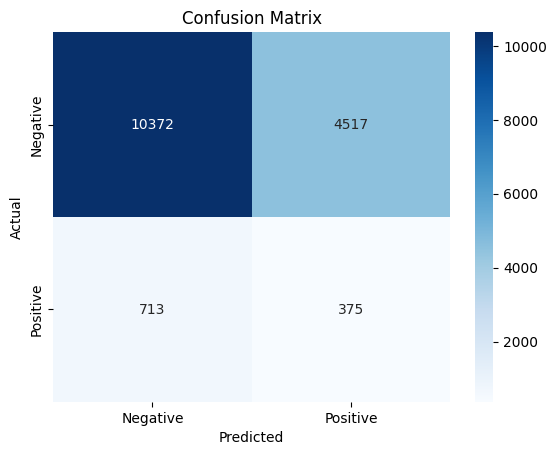

In [32]:
sns.heatmap(confusion_matrix(LR_test, LR_predicted), annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()